<a href="https://colab.research.google.com/github/vishnu4510/datascience/blob/main/Preprocessing_on_Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df= pd.read_csv('/content/train_loan_preprocess.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
df.shape

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
null_columns=df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
null_columns

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,No,71.0,360.0,1.0
610,Male,Yes,3+,No,40.0,180.0,1.0
611,Male,Yes,1,No,253.0,360.0,1.0
612,Male,Yes,2,No,187.0,360.0,1.0


In [32]:
null_columns.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [33]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [34]:
null_columns=df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
null_columns.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Married']=le.fit_transform(df['Married'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Dependents']=le.fit_transform(df['Dependents'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,1,1,3,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,0,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,1,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,0,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,0,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,0,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,1,1,3,Graduate,0,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,0,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,0,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


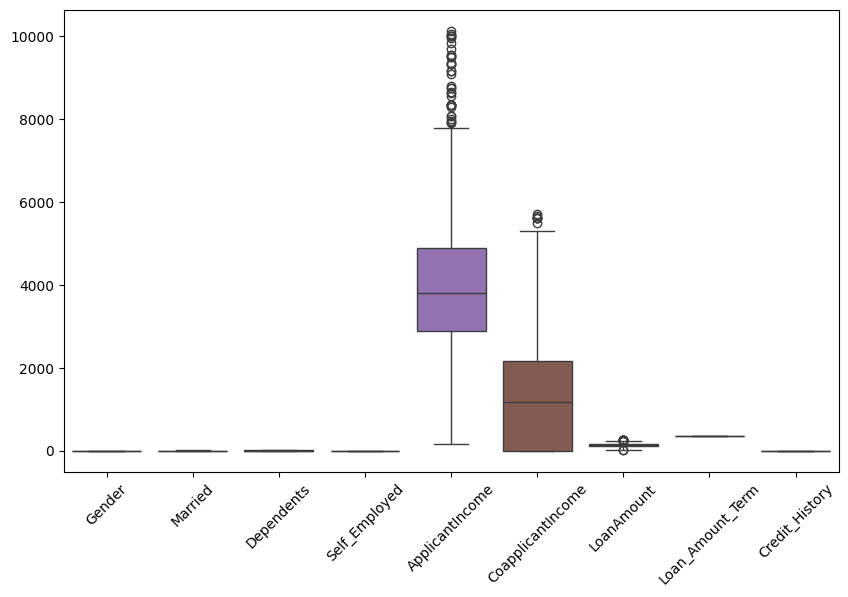

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [43]:

def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers


for col in df.select_dtypes(include=np.number).columns:
  outliers = detect_outliers_iqr(df[col])
  print(f"Outliers in {col}: {outliers}")

for col in df.select_dtypes(include=np.number).columns:
  outliers = detect_outliers_iqr(df[col])
  median = df[col].median()
  df[col] = np.where(df[col].isin(outliers), median, df[col])


Outliers in ApplicantIncome: 9      12841
34     12500
54     11500
67     10750
102    13650
106    11417
115    14583
119    10408
126    23803
128    10513
130    20166
138    14999
144    11757
146    14866
155    39999
171    51763
183    33846
185    39147
191    12000
199    11000
254    16250
258    14683
271    11146
278    14583
284    20667
308    20233
324    15000
333    63337
369    19730
370    15759
409    81000
424    14880
432    12876
438    10416
443    37719
467    16692
475    16525
478    16667
483    10833
487    18333
493    17263
506    20833
509    13262
525    17500
533    11250
534    18165
561    19484
572    16666
594    16120
604    12000
Name: ApplicantIncome, dtype: int64
Outliers in CoapplicantIncome: 9      10968.0
12      8106.0
38      7210.0
122     8980.0
135     7750.0
177    11300.0
180     7250.0
253     7101.0
349     6250.0
372     7873.0
402    20000.0
417    20000.0
444     8333.0
506     6667.0
513     6666.0
523     7166.0
581    33837.0

In [44]:


le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df
le=LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])
df
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849.0,0.0,NaN,360.0,1.0,2,1
1,LP001003,Male,Yes,1,0,No,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,0,Yes,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,1,No,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,0,No,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,0,No,2900.0,0.0,71.0,360.0,1.0,0,1
610,LP002979,Male,Yes,3+,0,No,4106.0,0.0,40.0,360.0,1.0,0,1
611,LP002983,Male,Yes,1,0,No,8072.0,240.0,253.0,360.0,1.0,2,1
612,LP002984,Male,Yes,2,0,No,7583.0,0.0,187.0,360.0,1.0,2,1


In [45]:


from sklearn.preprocessing import MinMaxScaler


numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

scaler = MinMaxScaler()


df[numerical_features] = scaler.fit_transform(df[numerical_features])


print(df.head())


    Loan_ID Gender Married Dependents  Education Self_Employed  \
0  LP001002   Male      No          0          0            No   
1  LP001003   Male     Yes          1          0            No   
2  LP001005   Male     Yes          0          0           Yes   
3  LP001006   Male     Yes          0          1            No   
4  LP001008   Male      No          0          0            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.570528           0.000000         NaN               0.0   
1         0.443788           0.264515    0.461240               0.0   
2         0.285314           0.000000    0.220930               0.0   
3         0.243568           0.413612    0.430233               0.0   
4         0.585644           0.000000    0.511628               0.0   

   Credit_History  Property_Area  Loan_Status  
0             0.0              2            1  
1             0.0              0            0  
2             0.0              2